In [ ]:
#AIM: to predict wether the patient has liver disease or not

In [2]:
import pandas as pd
import numpy as np#numerical python
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('indian_liver_patient.csv')

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
df.describe()#it gives mean median sd etc

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [8]:
df.info()#gives the type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

In [13]:
df.null().sum()

AttributeError: 'DataFrame' object has no attribute 'null'

In [14]:
df=df.dropna()

In [ ]:
#EDA

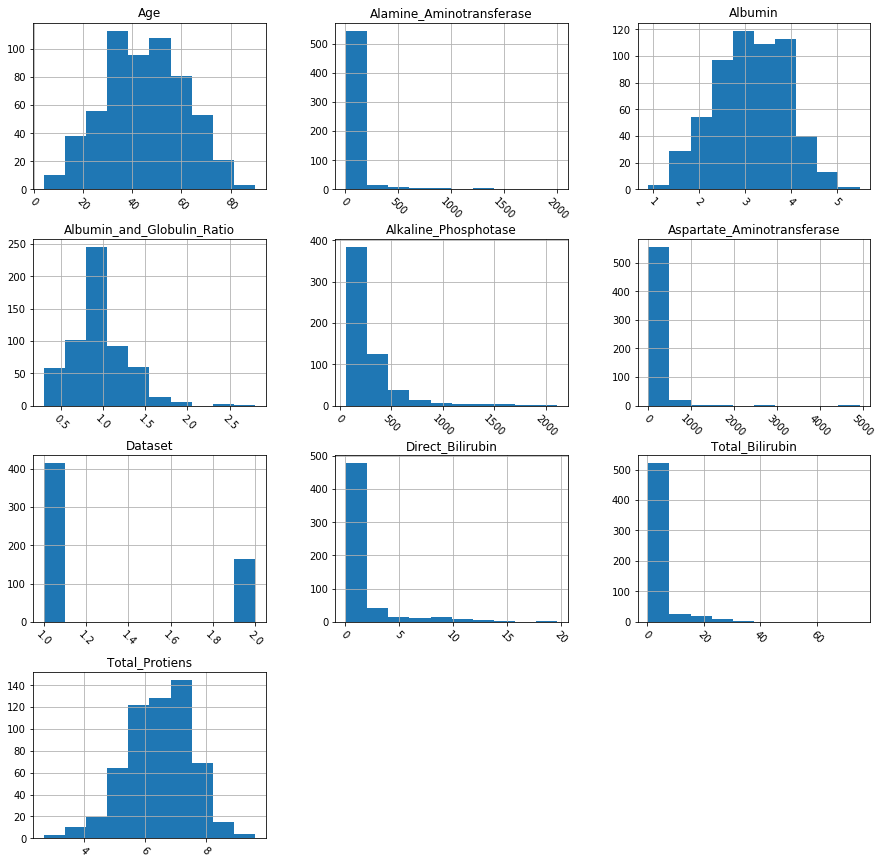

In [15]:
df.hist(figsize=(15,15),xrot=-45,bins=10)
plt.show()

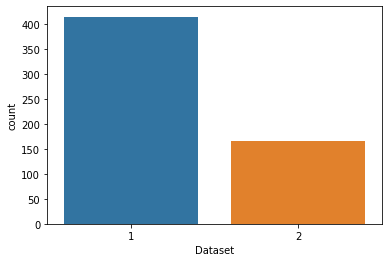

In [16]:
sns.countplot(x='Dataset',data=df)#gives attacked and unattacked persons

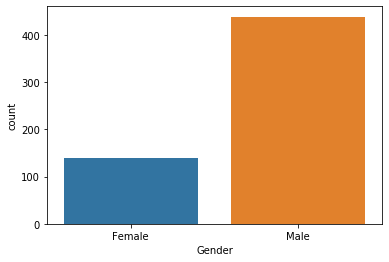

In [17]:
sns.countplot(x='Gender',data=df)#based on gender

In [18]:
M,F=df['Gender'].value_counts()
print('Number of Patients that are MALE: ',M)
print('Number of Patients that are FEMALE: ',F)

Number of Patients that are MALE:  439
Number of Patients that are FEMALE:  140


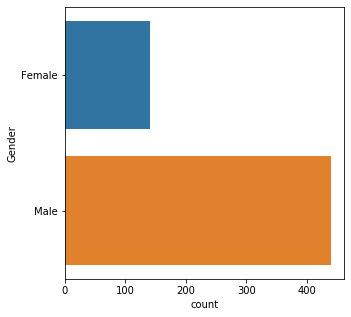

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender',data=df)#we gave y-axis as gender

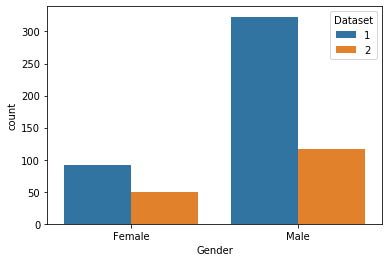

In [20]:
sns.countplot(x="Gender",hue="Dataset",data=df)

In [21]:
#now converting male and female to 0s and 1s
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [32]:
#here we are changing gender values 0=female and 1=male
df['Gender']=le.fit_transform(df['Gender'])

C:\Users\91814\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,GenderL
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [38]:
x=df.iloc[:,df.columns!='Dataset']
y=df.iloc[:,df.columns=='Dataset']

In [39]:
#x data
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,GenderL
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [40]:
#y data
y

,Dataset
0,1
1,1
2,1
3,1
4,1
...,...
578,2
579,1
580,1
581,1


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)#here it takes 80percent of the trained data

In [43]:
xtrain

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,GenderL
184,64,1,1.1,0.4,201,18,19,6.9,4.1,1.40,1
153,52,1,0.6,0.1,178,26,27,6.5,3.6,1.20,1
546,45,1,20.2,11.7,188,47,32,5.4,2.3,0.70,1
185,38,1,1.5,0.4,298,60,103,6.0,3.0,1.00,1
324,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
452,58,1,0.9,0.2,1100,25,36,7.1,3.5,0.90,1
434,30,0,0.7,0.2,194,32,36,7.5,3.6,0.92,0
405,31,0,0.8,0.2,215,15,21,7.6,4.0,1.10,0
79,58,0,2.8,1.3,670,48,79,4.7,1.6,0.50,0


In [44]:
ytrain

,Dataset
184,1
153,2
546,1
185,2
324,1
...,...
452,1
434,2
405,1
79,1


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()

In [47]:
import warnings

In [53]:
lr.fit(xtrain,ytrain.values.values)#to train the algorithm by using keyword fit

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [50]:
pred=lr.predict(xtest)

In [51]:
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [54]:
model1=accuracy_score(ytest,pred)

In [55]:
model1

0.6896551724137931

In [56]:
cnf2=confusion_matrix(ytest,pred)

In [57]:
cnf2

array([[75,  8],
       [28,  5]], dtype=int64)

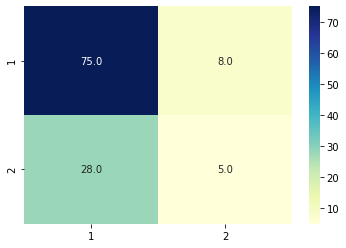

In [61]:
labels=[1,2]
sns.heatmap(cnf2,annot=True,cmap='YlGnBu',fmt='.1f',xticklabels=labels,yticklabels=labels)
plt.show()